In [1]:
# ======================================================================
# There are 5 questions in this exam with increasing difficulty from 1-5.
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score significantly
# less than your Category 5 question.
#
# Don't use lambda layers in your model.
# You do not need them to solve the question.
# Lambda layers are not supported by the grading infrastructure.
#
# You must use the Submit and Test button to submit your model
# at least once in this category before you finally submit your exam,
# otherwise you will score zero for this category.
# ======================================================================
#
# NLP QUESTION
#
# Build and train a classifier for the sarcasm dataset.
# The classifier should have a final layer with 1 neuron activated by sigmoid as shown.
# It will be tested against a number of sentences that the network hasn't previously seen
# and you will be scored on whether sarcasm was correctly detected in those sentences.

import json
import tensorflow as tf
import numpy as np
import urllib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# def solution_model():
url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
urllib.request.urlretrieve(url, 'sarcasm.json')


2024-05-21 15:37:06.118744: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 15:37:06.166090: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 15:37:06.166126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 15:37:06.167293: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 15:37:06.174395: I tensorflow/core/platform/cpu_feature_guar

('sarcasm.json', <http.client.HTTPMessage at 0x7f17b742f6d0>)

In [2]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords
    
    Args:
        sentence (string): sentence to remove the stopwords from
    
    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()
    
    ### START CODE HERE
    # Split the sentence into words
    words = sentence.split(" ")
    
    # Remove the stopwords
    sentence = " ".join([word for word in words if word not in stopwords])
    
    ### END CODE HERE
    return sentence

In [3]:

# DO NOT CHANGE THIS CODE OR THE TESTS MAY NOT WORK
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [4]:

sentences = []
labels = []


# YOUR CODE HERE
def parse_data_from_file(filename):
    """
    Extracts sentences and labels from a JSON file
    
    Args:
        filename (string): path to the JSON file
    
    Returns:
        sentences, labels (list of string, list of string): tuple containing lists of sentences and labels
    """
    sentences = []
    labels = []
    with open(filename, 'r') as jsonfile:
        data = json.load(jsonfile)
        
        for item in data:
            labels.append(item['is_sarcastic'])
            sentences.append(remove_stopwords(item['headline']))
        ### END CODE HERE
    return sentences, labels

sentences, labels = parse_data_from_file("sarcasm.json")

print("ORIGINAL DATASET:\n")
print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words (after removing stopwords).\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}\n\n")

ORIGINAL DATASET:

There are 26709 sentences in the dataset.

First sentence has 10 words (after removing stopwords).

There are 26709 labels in the dataset.

The first 5 labels are [0, 0, 1, 1, 0]


In [5]:
# GRADED FUNCTIONS: train_val_split
def train_val_split(sentences, labels, training_size):
    """
    Splits the dataset into training and validation sets
    
    Args:
        sentences (list of string): lower-cased sentences without stopwords
        labels (list of string): list of labels
        training split (float): proportion of the dataset to convert to include in the train set
    
    Returns:
        train_sentences, validation_sentences, train_labels, validation_labels - lists containing the data splits
    """
    
    ### START CODE HERE
    
    # Compute the number of sentences that will be used for training (should be an integer)
    num_train = training_size

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:num_train] 
    train_labels = labels[:num_train]

    validation_sentences = sentences[num_train:]
    validation_labels = labels[num_train:]
    
    ### END CODE HERE
    
    return train_sentences, validation_sentences, train_labels, validation_labels

In [6]:
# grader-required-cell

# Test your function
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, training_size)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 20000 sentences for training.

There are 20000 labels for training.

There are 6709 sentences for validation.

There are 6709 labels for validation.


In [7]:
# grader-required-cell

# GRADED FUNCTION: fit_tokenizer
def fit_tokenizer(train_sentences, num_words, oov_token):
    """
    Instantiates the Tokenizer class on the training sentences
    
    Args:
        train_sentences (list of string): lower-cased sentences without stopwords to be used for training
        num_words (int) - number of words to keep when tokenizing
        oov_token (string) - symbol for the out-of-vocabulary token
    
    Returns:
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    """
    
    ### START CODE HERE
    
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
    
    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)
    
    
    ### END CODE HERE
    
    return tokenizer

In [8]:

# Test your function
tokenizer = fit_tokenizer(train_sentences, vocab_size, oov_tok)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 25566 words

<OOV> token included in vocabulary


In [9]:
# GRADED FUNCTION: seq_and_pad
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    """
    Generates an array of token sequences and pads them to the same length
    
    Args:
        sentences (list of string): list of sentences to tokenize and pad
        tokenizer (object): Tokenizer instance containing the word-index dictionary
        padding (string): type of padding to use
        maxlen (int): maximum length of the token sequence
    
    Returns:
        padded_sequences (array of int): tokenized sentences padded to the same length
    """ 
    
    ### START CODE HERE
       
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, padding=padding, maxlen=maxlen)
    
    ### END CODE HERE
    
    return padded_sequences

In [10]:
# grader-required-cell

# Test your function
train_padded_seq = seq_and_pad(train_sentences, tokenizer, padding_type, max_length)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, padding_type, max_length)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (20000, 120)

Padded validation sequences have shape: (6709, 120)


In [11]:
train_labels_array = np.array(train_labels).reshape(-1,1)
val_labels_array = np.array(val_labels).reshape(-1,1)


In [61]:
from tensorflow.keras.layers import LSTM, Conv1D, Dropout, Dense, GlobalAveragePooling1D

# GRADED FUNCTION: create_model
def create_model(num_words, embedding_dim, maxlen):
    """
    Creates a text classifier model
    
    Args:
        num_words (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text classifier model
    """
    
    tf.random.set_seed(123)
    
    ### START CODE HERE
    
    model = tf.keras.Sequential([ 
        # Embedding layer
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
        Conv1D(128, 5, activation='relu'),
        Dropout(0.5),
        GlobalAveragePooling1D(),
        
        ## --- ###
    # # Add Bidirectional LSTM layer
    #     tf.keras.layers.Bidirectional(LSTM(units=128, return_sequences=True)),  # You can adjust the number of units
    #     tf.keras.layers.Dropout(0.5),
    #     tf.keras.layers.Bidirectional(LSTM(units=64, return_sequences=True)),  # You can adjust the number of units
    #     tf.keras.layers.Dropout(0.5),
    #     
    #     tf.keras.layers.Conv1D(64, 5, activation='relu'),
    #     tf.keras.layers.Conv1D(64, 5, activation='relu'),
    #     
    #     # Add Global Max Pooling layer
    #     tf.keras.layers.GlobalMaxPooling1D(),
    #     # Dense layer with 24 units
    #     tf.keras.layers.Dense(128, activation='relu'),
        
        ## --- ###
        # YOUR CODE HERE. KEEP THIS OUTPUT LAYER INTACT OR TESTS MAY FAIL
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 

    ### END CODE HERE

    return model

In [62]:
# NOTE: Please do not edit this cell

model = create_model(vocab_size, embedding_dim, max_length)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 120, 16)           16000     
                                                                 
 conv1d_12 (Conv1D)          (None, 116, 128)          10368     
                                                                 
 dropout_12 (Dropout)        (None, 116, 128)          0         
                                                                 
 global_average_pooling1d_7  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 26497 (103.50 KB)
Trainable params: 26497 (103.50 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [63]:
earlystop = tf.keras.callbacks.EarlyStopping('val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_padded_seq, train_labels_array,
                    batch_size=32,
                    epochs=30, validation_data=(val_padded_seq, val_labels_array), callbacks=[earlystop])

Epoch 1/30
625/625 [==============================] - 7s 10ms/step - loss: nan - accuracy: 0.5604 - val_loss: nan - val_accuracy: 0.5633
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.5603 - val_loss: nan - val_accuracy: 0.5633
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.5603 - val_loss: nan - val_accuracy: 0.5633
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.5603 - val_loss: nan - val_accuracy: 0.5633
Epoch 5/30
 23/625 [>.............................] - ETA: 1s - loss: nan - accuracy: 0.5285

KeyboardInterrupt: 

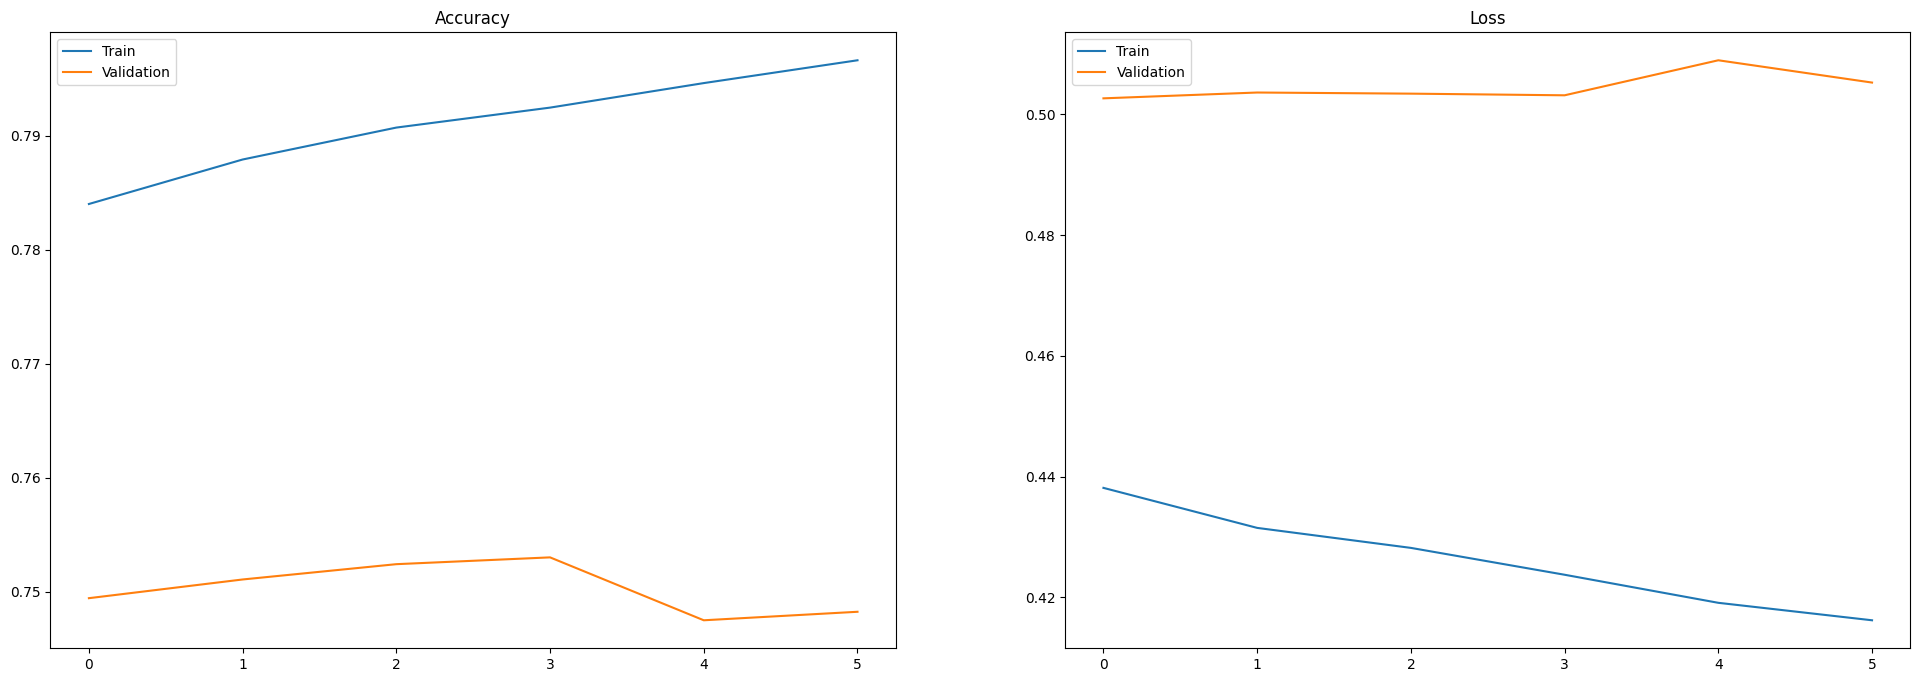

In [60]:
from history import plot_history
plot_history(history)

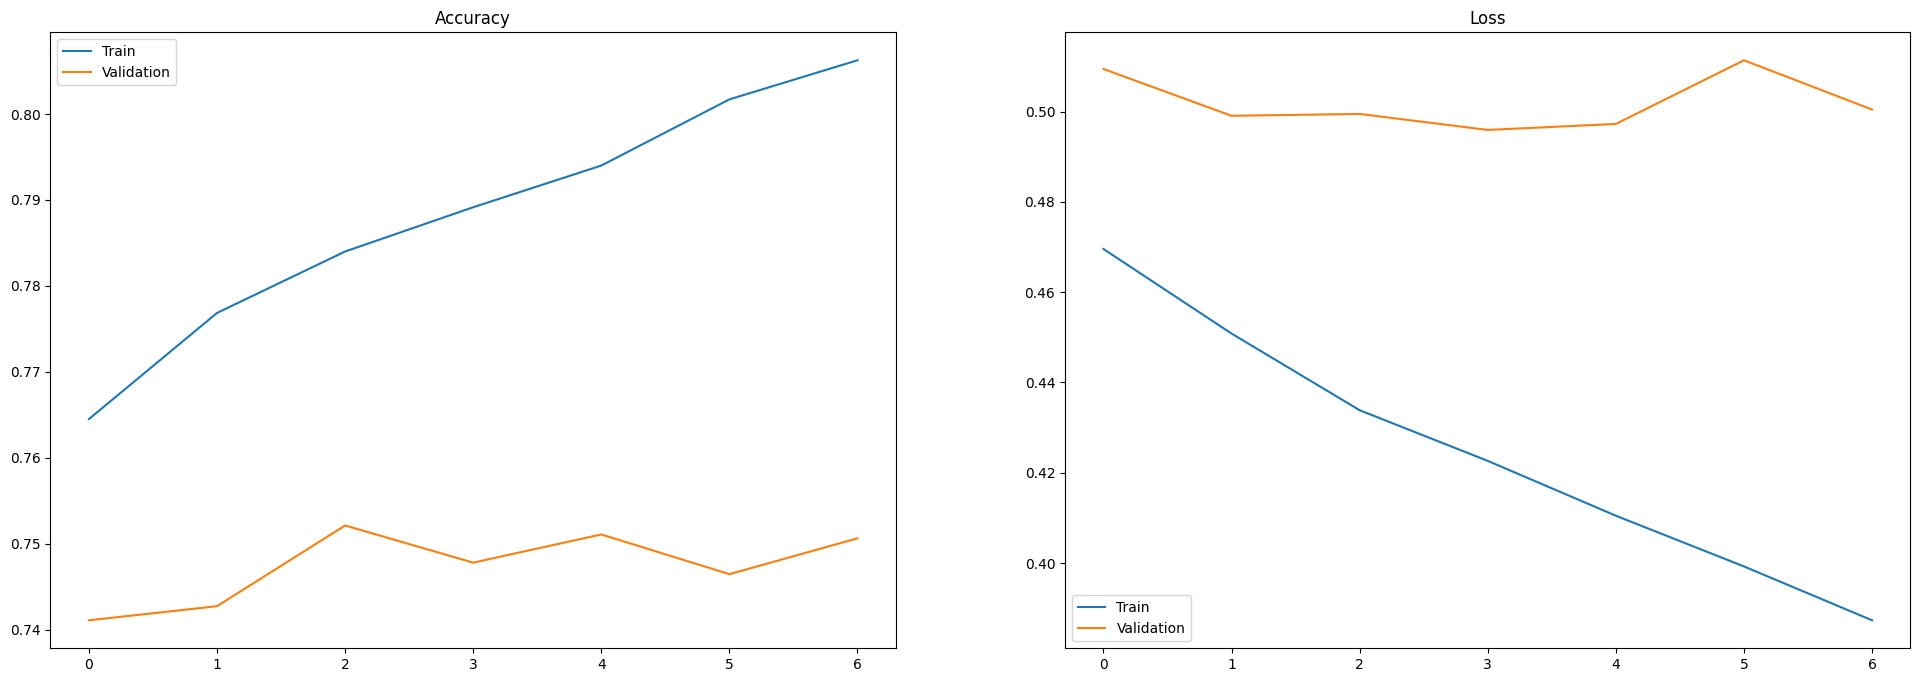

In [32]:
from history import plot_history
plot_history(history)

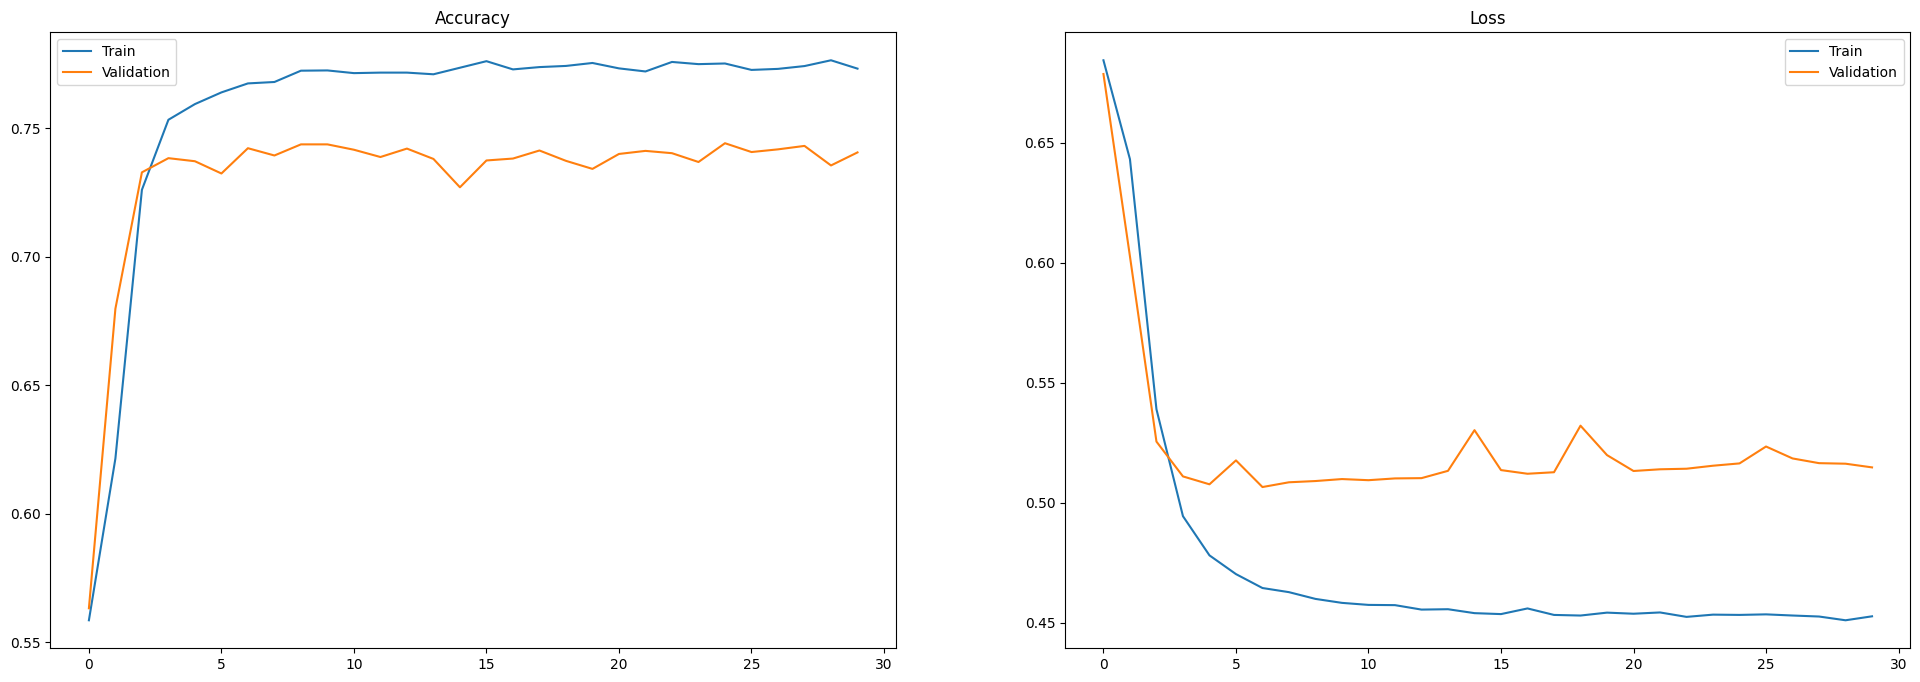

In [21]:
from history import plot_history
plot_history(history)

In [22]:

# Note that you'll need to save your model as a .h5 like this.
# When you press the Submit and Test button, your saved .h5 model will
# be sent to the testing infrastructure for scoring
# and the score will be returned to you.


model.save("mymodel.h5")


/opt/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
